### Exercise-7
### Python Program for K Nearest Neighbour Classification.

In [93]:
import csv, random, math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to Calculate Euclidean Distance
def euc(obj1, obj2, size):
    dist = 0
    for i in range(size):
        dist = dist + pow((obj1[i]-obj2[i]), 2)
    return math.sqrt(dist)

# Function to Return Top k Neighbours  
def gen_nbors(X_train, y_train, X_test, k): 
    dist = []
    nbors = []
    c = (len(X_test))
    for i in range(len(X_train)):
        d = euc(X_test, X_train[i], c)        # Calculating Euclidean Distance
        dist.append((X_train[i], y_train[i], d))
    dist = sorted(dist, key = lambda i: i[2]) # Sort datapoints
    for i in range(k):
        nbors.append(dist[i][0:2])            # Select Top k datapoints
    return nbors

# KNN Algorithm
def knn(nbors): 
    temp = {}
    for i in range(k):
        pred = nbors[i][-1]
        if pred in temp:
            temp[pred] = temp[pred]+1
        else:
            temp[pred] = 1
    sorted_pred = list(temp.items());        # Sort the list in decreasing order 
    return sorted_pred[0][0]

# Input: Dataset 
dataset = load_iris()

# Separating Features and Target Values
X = dataset.data
y = dataset.target

# Input: Size of Test Dataset and Number of Neighbours (k)
print("\n\nTaking Input Parameters\n")
te_size = input("Enter the Testing Data Size (as decimal ratio): ")
te_size = float(te_size)
k = input("Enter the Value of k: ")
k = int(k)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = te_size)

predicted = []
print('\nNumber of Training data samples: '+str(len(X_test)))

for i in range(len(X_test)):
    nbors = gen_nbors(X_train, y_train, X_test[i], k);  
    predd= knn(nbors)                                  
    predicted.append(predd)



Taking Input Parameters

Enter the Testing Data Size (as decimal ratio): 0.3
Enter the Value of k: 5

Number of Training data samples: 45


### Exercise-7
### Output for K Nearest Neighbour Classification.



ACCURACY METRIC OF K NEAREST NEIGHBOUR CLASSIFIER

Predicted Class: 

0 0 0 2 0 1 2 1 0 2 0 2 0 2 2 2 0 0 2 2 1 0 1 1 1 2 1 1 2 1 1 2 2 0 0 2 0 2 2 2 1 1 1 1 2

Actual Class: 

0 0 0 2 0 1 2 1 0 2 0 2 0 2 2 2 0 0 2 2 1 0 2 1 1 2 1 1 2 1 1 2 2 0 0 2 0 2 2 1 1 2 1 1 2

Number of mislabeled points out of a total 45 points : 3

The Confusion Matrix for the K Nearest Neighbour Model




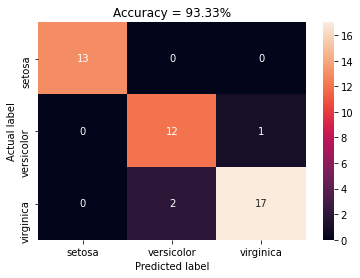


The Classification Report for the K Nearest Neighbour Model

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.92      0.89        13
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [97]:
# Output: The Predicted vs Actual Class, Confusion Matrix & Classification Report
print("\n\nACCURACY METRIC OF K NEAREST NEIGHBOUR CLASSIFIER")
print("\nPredicted Class: \n")
print(*predicted, sep=' ')
print("\nActual Class: \n")
print(*y_test, sep=' ')
print("\nNumber of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != predicted).sum()))
print("\nThe Confusion Matrix for the K Nearest Neighbour Model\n\n")
cm = metrics.confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy = {0:.2f}%'.format(metrics
                                      .accuracy_score(y_test, predicted)*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nThe Classification Report for the K Nearest Neighbour Model\n\n"
      ,metrics.classification_report(y_test, predicted))

### Exercise-7
### Predicting Class for User Query.

In [95]:
# To take query from User
lst = [] 

# Input: Feature Values for Target Prediction 
print("\nEnter Feature Values (Sepal Width,Sepal Length,Petal Width,Petal Length)")
for i in range(0, 4): 
    ele = float(input())
    lst.append(ele)   

# Making Prediction
nbors= gen_nbors(X_train, y_train, lst, k)
predd= knn(nbors)
if(predd<=0.5):
    predd1=0
elif(predd<=1.5):
    predd1=1
else:
    predd1=2

# Output: Predicted Class
print("The Predicted Class for Feature Set ",lst," is ", predd1,".")


Enter Feature Values (Sepal Width,Sepal Length,Petal Width,Petal Length)
0.5
1.25
2
1.3
The Predicted Class for Feature Set  [0.5, 1.25, 2.0, 1.3]  is  0 .


##### The KNN Classifier Model gives an accuracy of 93.33% for Iris Dataset (70% Training Data and 30% Testing Data) when trained with value of k=5. The model can be used to predict the class for a given set of features, with the help of query code built.